### Problem statement we want to predict that airline customer will loyal or disloyal using ANN

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import  confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('cust_satisfaction.csv')
df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      103904 non-null  object 
 1   Customer Type               103904 non-null  object 
 2   Type of Travel              103904 non-null  object 
 3   Class                       103904 non-null  object 
 4   satisfaction                103904 non-null  object 
 5   Age                         103904 non-null  int64  
 6   Flight Distance             103904 non-null  int64  
 7   Inflight entertainment      103904 non-null  int64  
 8   Baggage handling            103904 non-null  int64  
 9   Cleanliness                 103904 non-null  int64  
 10  Departure Delay in Minutes  103904 non-null  int64  
 11  Arrival Delay in Minutes    103594 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 9.5+ MB


In [6]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})
df['Customer Type'] = df['Customer Type'].map({'Loyal Customer':1,'disloyal Customer':0})
df['Type of Travel'] = df['Type of Travel'].map({'Business travel':1,'Personal Travel':0})
df['Class'] = df['Class'].map({'Business':1,'Eco':2,'Eco Plus':3})
df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied':0,'satisfied':1})


In [5]:
df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,1,0,3,0,13,460,5,4,5,25,18.0
1,1,0,1,1,0,25,235,1,3,1,1,6.0
2,0,1,1,1,1,26,1142,5,4,5,0,0.0
3,0,1,1,1,0,25,562,2,3,2,11,9.0
4,1,1,1,1,1,61,214,3,4,3,0,0.0


In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns 

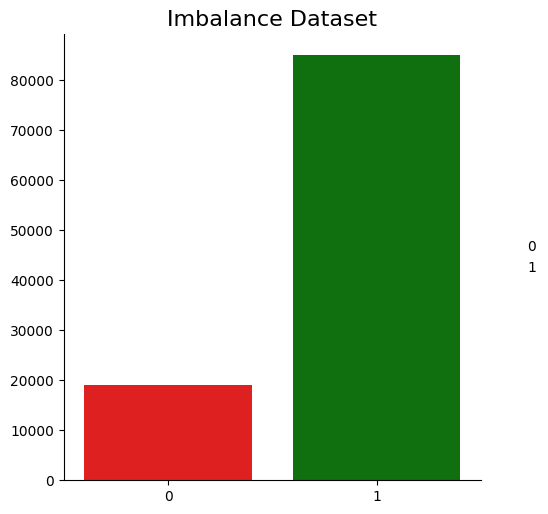

In [7]:
index = list((df['Customer Type'].value_counts().values))
label = list((df['Customer Type'].value_counts().keys()))
color= ['red','green']
sns.catplot(x =label ,y=index,kind='bar',palette=color)
plt.title("Imbalance Dataset",fontsize=16)
plt.show()

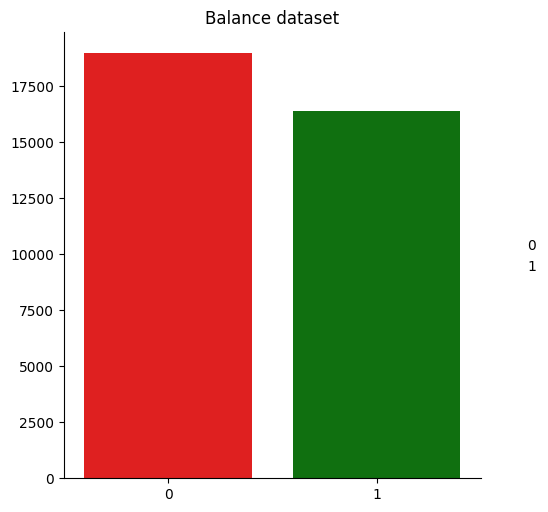

In [7]:
loyal_customer = df[df['Customer Type']==1].loc[0:20000]
disloyal_customer = df[df['Customer Type']==0]

balance_df = pd.concat([loyal_customer,disloyal_customer])
colors = ['red','green']
sns.catplot(x = list((balance_df['Customer Type'].value_counts().keys())),
y=list((balance_df['Customer Type'].value_counts().values)),kind='bar',
palette=colors)
plt.title('Balance dataset')
plt.show()

In [9]:
# checking missing value in our dataset.
balance_df.isnull().sum()

Gender                         0
Customer Type                  0
Type of Travel                 0
Class                          0
satisfaction                   0
Age                            0
Flight Distance                0
Inflight entertainment         0
Baggage handling               0
Cleanliness                    0
Departure Delay in Minutes     0
Arrival Delay in Minutes      94
dtype: int64

In [10]:
#To extract only those records, where the missing value is present.
null_df = balance_df.loc[balance_df.isnull()['Arrival Delay in Minutes']]
null_df.head()


,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
213,0,1,1,2,1,38,109,5,4,5,31,NaN
1124,1,1,0,2,0,53,1012,4,4,4,38,NaN
1529,1,1,1,1,0,39,733,2,2,3,11,NaN
2108,0,1,0,2,0,24,417,5,2,5,1,NaN
2485,0,1,0,2,1,28,2370,3,4,3,3,NaN


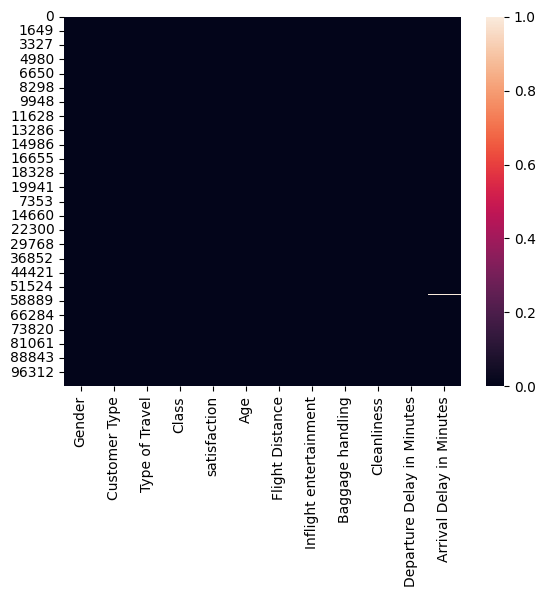

In [11]:
sns.heatmap(balance_df.isnull())
plt.show()
# to visualaize the represenatation of missing value

In [9]:
balance_df.dropna().isnull().sum()


Gender                        0
Customer Type                 0
Type of Travel                0
Class                         0
satisfaction                  0
Age                           0
Flight Distance               0
Inflight entertainment        0
Baggage handling              0
Cleanliness                   0
Departure Delay in Minutes    0
Arrival Delay in Minutes      0
dtype: int64

In [11]:
balance_df.dropna(inplace=True)

In [13]:
balance_df.isnull().sum()

Gender                        0
Customer Type                 0
Type of Travel                0
Class                         0
satisfaction                  0
Age                           0
Flight Distance               0
Inflight entertainment        0
Baggage handling              0
Cleanliness                   0
Departure Delay in Minutes    0
Arrival Delay in Minutes      0
dtype: int64

In [14]:
# splitting the dataset into independent and dependent variables
x = balance_df.drop('Customer Type',axis=1)
y = balance_df[['Customer Type']]

print("shape of x :", x.shape ," and shape of y :",y.shape,"\n")
# spliting the dataset into training and testing set 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

print(" x_train shape :",x_train.shape,"\n","x_test shape :",x_test.shape,
"\n","y_train shape :",y_train.shape,"\n","y_test shape :",y_test.shape)

shape of x : (35269, 11)  and shape of y : (35269, 1) 

 x_train shape : (28215, 11) 
 x_test shape : (7054, 11) 
 y_train shape : (28215, 1) 
 y_test shape : (7054, 1)


### Standard Scaling the Dataset

In [15]:
from sklearn.preprocessing import  StandardScaler
st_scaler = StandardScaler()

x_train_scaled = st_scaler.fit_transform(x_train)
x_test_scaled  = st_scaler.transform(x_test)

## We are importing all the necessary library for build ANN

In [2]:
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import  Sequential,load_model

In [17]:
x_train_scaled.shape,    y_train.shape   # shape of the Dataset

((28290, 11), (28290, 1))

In [18]:
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import  Sequential
### Defining ANN Model

Ann_Model = Sequential()
# Hidden layers
Ann_Model.add(Dense(units=68,activation='relu',input_dim=x_train_scaled.shape[1]))
Ann_Model.add(Dense(units=32,activation='relu'))
Ann_Model.add(Dense(units=24,activation='relu'))
Ann_Model.add(Dense(units=12,activation='relu'))
#output layers
Ann_Model.add(Dense(units=1,activation='sigmoid'))

#compiling the models
Ann_Model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
Ann_Model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 68)                816       
                                                                 
 dense_1 (Dense)             (None, 32)                2208      
                                                                 
 dense_2 (Dense)             (None, 24)                792       
                                                                 
 dense_3 (Dense)             (None, 12)                300       
                                                                 
 dense_4 (Dense)             (None, 1)                 13        
                                                                 
Total params: 4129 (16.13 KB)
Trainable params: 4129 (16.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
history = Ann_Model.fit(x_train_scaled,y_train,epochs=15,validation_data=(x_test_scaled,y_test))

Epoch 1/15


882/882 [==============================] - 12s 8ms/step - loss: 0.2729 - accuracy: 0.8952 - val_loss: 0.2407 - val_accuracy: 0.9083
Epoch 2/15
882/882 [==============================] - 8s 9ms/step - loss: 0.2312 - accuracy: 0.9113 - val_loss: 0.2378 - val_accuracy: 0.9113
Epoch 3/15
882/882 [==============================] - 5s 6ms/step - loss: 0.2196 - accuracy: 0.9155 - val_loss: 0.2191 - val_accuracy: 0.9199
Epoch 4/15
882/882 [==============================] - 5s 5ms/step - loss: 0.2120 - accuracy: 0.9193 - val_loss: 0.2121 - val_accuracy: 0.9200
Epoch 5/15
882/882 [==============================] - 5s 6ms/step - loss: 0.2058 - accuracy: 0.9219 - val_loss: 0.2100 - val_accuracy: 0.9222
Epoch 6/15
882/882 [==============================] - 6s 7ms/step - loss: 0.2026 - accuracy: 0.9227 - val_loss: 0.2113 - val_accuracy: 0.9174
Epoch 7/15
882/882 [==============================] - 5s 6ms/step - loss: 0.1989 - accuracy: 0.9251 - val_loss: 0.2075 - val_accuracy: 0.9215
Epo

In [23]:
history = Ann_Model.fit(x_train_scaled,y_train, initial_epoch=15,epochs=50,validation_data=(x_test_scaled,y_test))


Epoch 16/50
  1/882 [..............................] - ETA: 10s - loss: 0.1639 - accuracy: 0.9688

882/882 [==============================] - 4s 5ms/step - loss: 0.1833 - accuracy: 0.9308 - val_loss: 0.2033 - val_accuracy: 0.9236
Epoch 17/50
882/882 [==============================] - 4s 5ms/step - loss: 0.1828 - accuracy: 0.9311 - val_loss: 0.2023 - val_accuracy: 0.9243
Epoch 18/50
882/882 [==============================] - 4s 5ms/step - loss: 0.1819 - accuracy: 0.9308 - val_loss: 0.1991 - val_accuracy: 0.9261
Epoch 19/50
882/882 [==============================] - 4s 5ms/step - loss: 0.1806 - accuracy: 0.9304 - val_loss: 0.1970 - val_accuracy: 0.9264
Epoch 20/50
882/882 [==============================] - 5s 5ms/step - loss: 0.1792 - accuracy: 0.9322 - val_loss: 0.1978 - val_accuracy: 0.9263
Epoch 21/50
882/882 [==============================] - 5s 5ms/step - loss: 0.1783 - accuracy: 0.9319 - val_loss: 0.2044 - val_accuracy: 0.9234
Epoch 22/50
882/882 [==============================] - 5s 6ms/step - loss: 0.1771 - accuracy: 0.9321 - val_loss: 0.2027 - val_accuracy: 0.9276
Epoch 23/50

In [24]:
import pandas as pd 
training_details = pd.DataFrame(history.history)
training_details

,loss,accuracy,val_loss,val_accuracy
0,0.183292,0.930781,0.203263,0.923589
1,0.182757,0.931136,0.202287,0.924298
2,0.181881,0.930817,0.199098,0.926141
3,0.180560,0.930427,0.197016,0.926425
4,0.179184,0.932235,0.197832,0.926283
5,0.178303,0.931880,0.204443,0.923448
6,0.177063,0.932128,0.202654,0.927559
7,0.177252,0.933227,0.192660,0.927984
8,0.175573,0.931880,0.199637,0.925149
9,0.174696,0.933156,0.196191,0.927559


<Axes: >

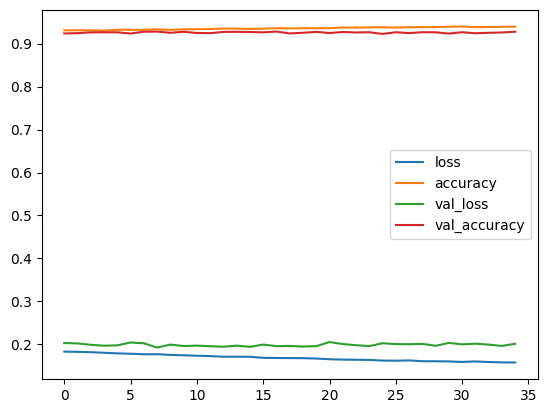

In [25]:
training_details.plot()
# all are plotted

<Axes: >

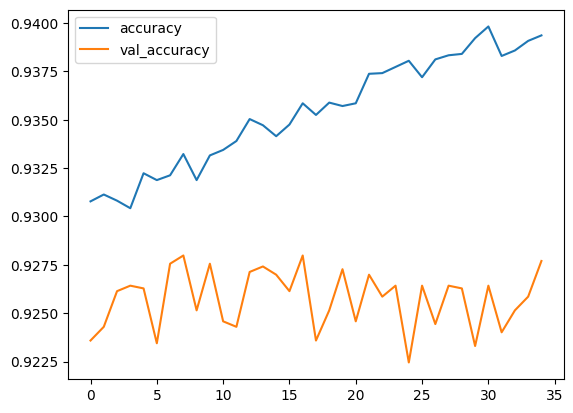

In [26]:
training_details[['accuracy','val_accuracy']].plot()
# Training Accuracy Vs Validation Accuracy

In [3]:
#you can save your model,
Ann_Model.save("custom_satisfaction.h5")

# to load your model
Ann_Model = load_model('custom_satisfaction.h5')


In [16]:
# Get Prediction Probability
y_pred = Ann_Model.predict(x_test_scaled)
prediction_label = (y_pred>0.5).astype('int').ravel()
prediction_label

221/221 [==============================] - 2s 3ms/step


array([1, 0, 1, ..., 0, 0, 1])

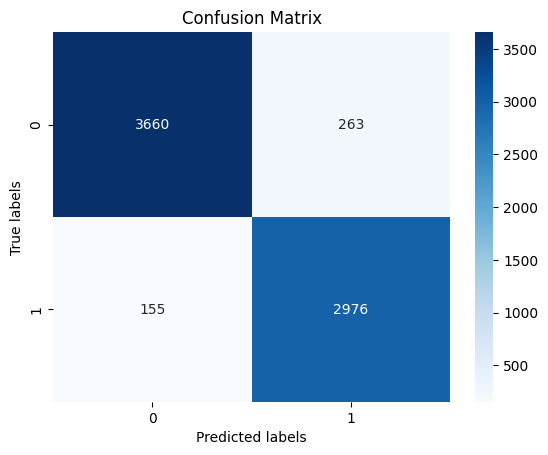

In [20]:
# confusion metrix
cm = confusion_matrix(prediction_label,y_test)

sns.heatmap(cm, annot=True,fmt="d",  cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [52]:
from sklearn.metrics import classification_report

In [18]:
#classification report
print(classification_report(prediction_label,y_test))


              precision    recall  f1-score   support

           0       0.96      0.93      0.95      3923
           1       0.92      0.95      0.93      3131

    accuracy                           0.94      7054
   macro avg       0.94      0.94      0.94      7054
weighted avg       0.94      0.94      0.94      7054



## EarlyStoping , Dropout and HyperparameterTurning

Thank you